In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [2]:
#Loading Boston Dataset
X = load_boston().data
Y = load_boston().target
print(X.shape)


(506, 13)


In [3]:
#Splitting into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [0]:
# Standardising the datapoints
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### SciKit Learn Implementation

In [5]:
clf = SGDRegressor()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print("Weight vector: ",clf.coef_)
print("intercept: ",clf.intercept_)

Weight vector:  [-1.04008206  1.06950895 -0.12654533  0.75821618 -2.38329473  2.74633182
  0.08226894 -3.14355936  1.97075791 -1.0550079  -1.93904723  0.86760287
 -3.95378736]
intercept:  [22.69195894]


In [6]:
mse_ski = mean_squared_error(y_test, y_predict)
print("Mean squared Error of scikit learn :",mse_ski)

Mean squared Error of scikit learn : 20.518062124053632


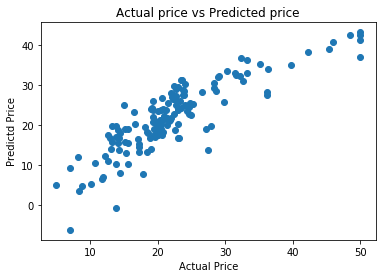

In [7]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predictd Price')
plt.title('Actual price vs Predicted price')
plt.show()

### Custom Implementation

In [8]:
#Training on train data
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html
#https://docs.python.org/3.1/library/random.html
import random

n=X_train.shape[0]
d=X_train.shape[1]
e = 0.01                    #Learning rate ------ Default value of scikitlearn 
w_new = np.random.rand(1,d) #Initializing w vector
b_new=random.random()       #Initializing b
K=20                        #Batch size
n_iter = 1000               #Max Iterations ------ Default value of scikitlearn


for i in range(n_iter):
  k=np.random.randint(0,n,K)  #Selecting K random data points
  w=w_new
  b=b_new
  sum_w=np.zeros((1,d))
  sum_b=0
  for j in k:
    sum_w = sum_w+((-2*X_train[j])*(y_train[j]-np.matmul(w,X_train[j])-b))
    sum_b = sum_b+(-2*(y_train[j]-np.matmul(w,X_train[j])-b))
    
  w_new = w-(e*(sum_w/K))
  b_new = b-(e*(sum_b/K))
 
  e=e-0.00001         # Reducing the learning rate
  
print("Weight vector: ",w_new)
print("Intercept: ",b_new)

Weight vector:  [[-0.9865442   1.02432991 -0.25378804  0.67700086 -1.92622676  2.85268624
   0.03085814 -2.88628254  1.5257976  -0.77236787 -1.86087051  0.93844945
  -3.87827614]]
Intercept:  [22.66594887]


In [0]:
#Predicting on Test data
y_ci=[]

for i in range(X_test.shape[0]):
    pred = np.matmul(w_new,X_test[i])+b_new
    y_ci.append(np.asscalar(pred))

In [10]:
mse_ci = mean_squared_error(y_test, y_ci)
print("Mean squared Error of Custom Implementation :",mse_ci)

Mean squared Error of Custom Implementation : 20.2812844158151


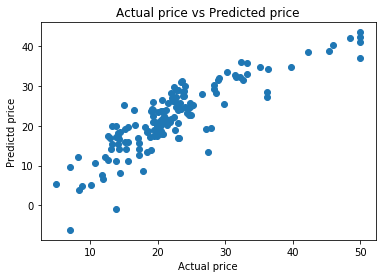

In [11]:
plt.scatter(y_test,y_ci)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [14]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['Weights--Scikit','Weights--Custom']

for i in range(d):
  x.add_row([clf.coef_[i],w_new[0][i]])
print(x)

+---------------------+----------------------+
|   Weights--Scikit   |   Weights--Custom    |
+---------------------+----------------------+
|  -1.040082062184986 | -0.9865441958468804  |
|  1.0695089498549928 |  1.024329913719568   |
| -0.1265453341959139 | -0.25378803896151736 |
|  0.7582161841701067 |  0.6770008605676345  |
| -2.3832947346385533 | -1.9262267580402848  |
|  2.7463318161550556 |  2.852686243226958   |
| 0.08226893683132276 | 0.030858136135553476 |
| -3.1435593643313555 | -2.8862825352658406  |
|  1.9707579089592684 |  1.525797596667679   |
| -1.0550078987615479 | -0.7723678733749444  |
| -1.9390472346476728 |  -1.860870507584709  |
|  0.8676028727474264 |  0.938449451886887   |
| -3.9537873606240055 |  -3.87827613653551   |
+---------------------+----------------------+


In [15]:
x = PrettyTable()
x.field_names=['MSE Scikit Implementation','MSE Custom Implementation']
x.add_row([mse_ski,mse_ci])
print(x)

+---------------------------+---------------------------+
| MSE Scikit Implementation | MSE Custom Implementation |
+---------------------------+---------------------------+
|     20.518062124053632    |      20.2812844158151     |
+---------------------------+---------------------------+
